In [ ]:
# Convolutional Neural Networks and Fully Connected Networks

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

# Q1) Understanding the Dataset and Pre-processing: Implement the following:

#### Loading the MNIST Fashion Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#### Understanding the Data

In [3]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


### a) Compute and display the number of classes

In [4]:
print("Number of classes = ",len(np.unique(y_train)))

Number of classes =  10


In [5]:
# no. of classes
classes=np.unique(y_train)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
classes_=len(classes)
classes_

10

#### Plotting the Data

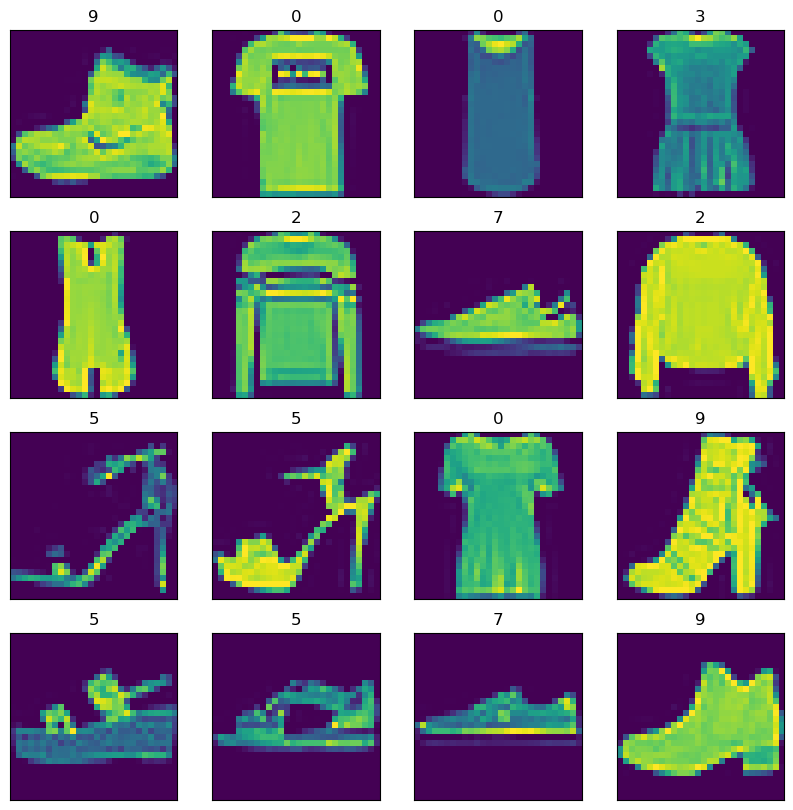

In [9]:
plt.figure(figsize=(10, 10))

for i in range(16):
    
    plt.subplot(4, 4, i + 1)

    # Xticks and Yticks are empty as we dont want any scale
    plt.xticks([])
    plt.yticks([])

    # We dont want a grid on out img
    plt.grid(False)

    # Displays the image
    plt.imshow(X_train[i].reshape((28,28))) #cmap="Greys"

    # Provides the correct label for our image
    label_index = int(y_train[i])
    plt.title(classes[label_index])
plt.show()

### b) Compute and display the dimensions of each image.

In [10]:
image_height, image_width = X_train.shape[1], X_train.shape[2]

print("Image dimensions:", image_height, "x", image_width)

Image dimensions: 28 x 28


### c) Displaying 1 image from each class

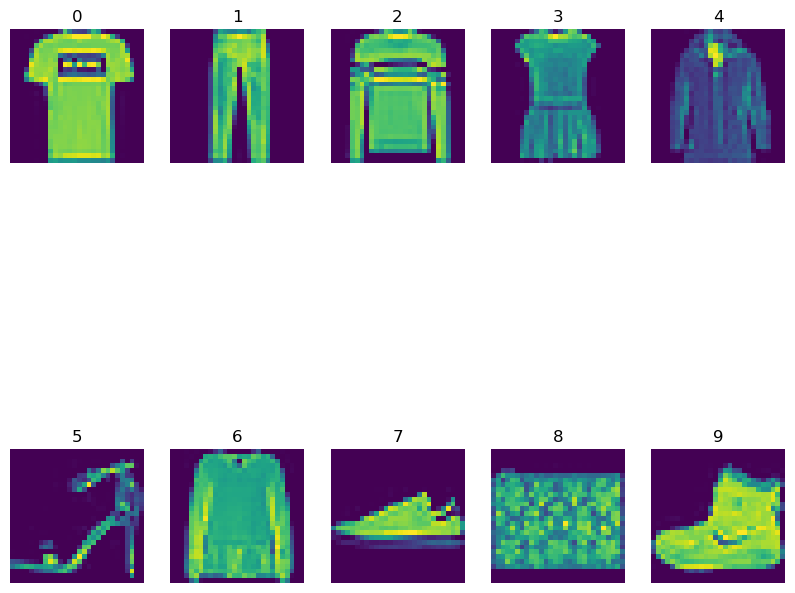

In [13]:
plt.figure(figsize=(10, 10))

for i in range(10):

    idx = np.where(y_train == i)[0][0]
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx]) #cmap='gray'
    plt.title(classes[i])
    plt.axis('off')

plt.show()

### d) Normalizing the data

In [14]:
X_train = X_train/255
X_test = X_test/255

#### Splitting the data in Train and Test 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state= 224)

## FCNN Building

In [16]:
fcnn = keras.models.Sequential([
    
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    
    # Fully connected layers
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    
    # Output Layer
    keras.layers.Dense(units=10, activation='softmax')
])

fcnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
fcnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = fcnn.fit(X_train, y_train, epochs=20, batch_size = 512, validation_split=0.1)

Epoch 1/20
85/85 [==============================] - 0s 3ms/step - loss: 0.7928 - accuracy: 0.7372 - val_loss: 0.5149 - val_accuracy: 0.8263
Epoch 2/20
85/85 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.8410 - val_loss: 0.4529 - val_accuracy: 0.8381
Epoch 3/20
85/85 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8543 - val_loss: 0.4125 - val_accuracy: 0.8558
Epoch 4/20
85/85 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8629 - val_loss: 0.3993 - val_accuracy: 0.8621
Epoch 5/20
85/85 [==============================] - 0s 2ms/step - loss: 0.3670 - accuracy: 0.8697 - val_loss: 0.4011 - val_accuracy: 0.8633
Epoch 6/20
85/85 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8743 - val_loss: 0.3771 - val_accuracy: 0.8704
Epoch 7/20
85/85 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8806 - val_loss: 0.3699 - val_accuracy: 0.8737
Epoch 8/20
85/85 [==

In [24]:
#model evaluation
test_loss, test_acc = fcnn.evaluate(X_test, y_test)

375/375 [==============================] - 0s 409us/step - loss: 0.3247 - accuracy: 0.8838


In [25]:
print('test accuracy')
print(f"{(test_acc*100):.2f}%")

test accuracy
88.38%


### Plotting the performance curves.

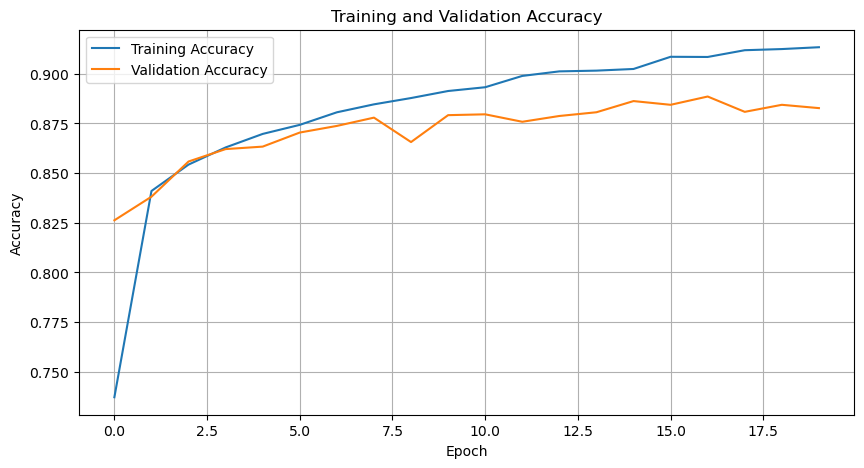

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

#### Our model is not overfitting and has good test and train accuracy

## CNN1 Model Building

In [27]:
cnn1 = keras.models.Sequential([
    
    # Convolution Layer
    keras.layers.Conv2D(filters = 32, kernel_size = 5, strides= (1,1), padding ='valid', activation ='relu', input_shape = [28,28,1]),
    
    # Max Pooling Layer
    keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2, 2)),
    
    # Flattening the Layer
    keras.layers.Flatten(),
    
    # Building Neural Network
    keras.layers.Dense(units = 100, activation = 'relu'),
    
    # Output Layer
    keras.layers.Dense(units = 10, activation = 'softmax'),
    
])

cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               460900    
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 462742 (1.77 MB)
Trainable params: 462742 (1.77 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [28]:
cnn1.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
history1 = cnn1.fit(X_train, y_train, epochs=20, batch_size = 512, verbose= 1, validation_split=0.1)

Epoch 1/20
85/85 [==============================] - 3s 36ms/step - loss: 0.6895 - accuracy: 0.7693 - val_loss: 0.4679 - val_accuracy: 0.8398
Epoch 2/20
85/85 [==============================] - 3s 34ms/step - loss: 0.4196 - accuracy: 0.8546 - val_loss: 0.4024 - val_accuracy: 0.8573
Epoch 3/20
85/85 [==============================] - 3s 35ms/step - loss: 0.3685 - accuracy: 0.8709 - val_loss: 0.3565 - val_accuracy: 0.8758
Epoch 4/20
85/85 [==============================] - 3s 36ms/step - loss: 0.3333 - accuracy: 0.8835 - val_loss: 0.3371 - val_accuracy: 0.8808
Epoch 5/20
85/85 [==============================] - 3s 36ms/step - loss: 0.3105 - accuracy: 0.8904 - val_loss: 0.3433 - val_accuracy: 0.8777
Epoch 6/20
85/85 [==============================] - 3s 35ms/step - loss: 0.2943 - accuracy: 0.8963 - val_loss: 0.3156 - val_accuracy: 0.8858
Epoch 7/20
85/85 [==============================] - 3s 35ms/step - loss: 0.2822 - accuracy: 0.9005 - val_loss: 0.3084 - val_accuracy: 0.8898
Epoch 8/20
85

### Testing the model

In [30]:
print("Accuracy = " ,cnn1.evaluate(X_test, y_test)[1])

375/375 [==============================] - 1s 1ms/step - loss: 0.2514 - accuracy: 0.9103
Accuracy =  0.9102500081062317


### Visualizing the Performance Curves

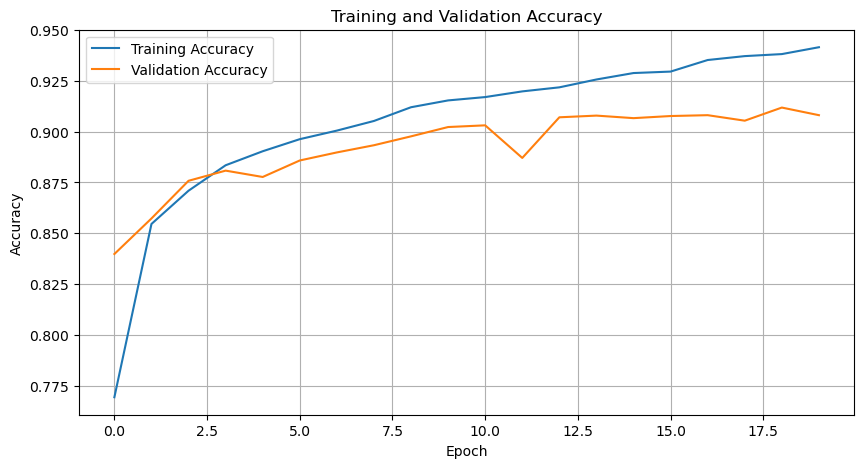

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

## CNN2 Model Building

In [32]:
cnn2 = keras.models.Sequential([
    
    # Convolution Layer
    keras.layers.Conv2D(filters = 32, kernel_size = 3, strides= (1,1), padding ='valid', activation ='relu', input_shape = [28,28,1]),
    keras.layers.Conv2D(filters = 32, kernel_size = 3, strides= (1,1), padding ='valid', activation ='relu', input_shape = [28,28,1]),

    # Max Pooling Layer
    keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2, 2)),
    
    # Flattening the Layer
    keras.layers.Flatten(),
    
    # Building Neural Network
    keras.layers.Dense(units = 100, activation = 'relu'),
    
    # Output Layer
    keras.layers.Dense(units = 10, activation = 'softmax'),
    
])

cnn2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_5 (Dense)             (None, 100)               460900    
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                      

In [33]:
cnn2.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
history2 = cnn2.fit(X_train, y_train, epochs=20, batch_size = 512, verbose= 1, validation_split=0.1)

Epoch 1/20
85/85 [==============================] - 10s 117ms/step - loss: 0.6886 - accuracy: 0.7645 - val_loss: 0.4250 - val_accuracy: 0.8506
Epoch 2/20
85/85 [==============================] - 10s 112ms/step - loss: 0.3906 - accuracy: 0.8617 - val_loss: 0.3671 - val_accuracy: 0.8702
Epoch 3/20
85/85 [==============================] - 9s 111ms/step - loss: 0.3320 - accuracy: 0.8833 - val_loss: 0.3297 - val_accuracy: 0.8815
Epoch 4/20
85/85 [==============================] - 10s 114ms/step - loss: 0.2980 - accuracy: 0.8945 - val_loss: 0.2999 - val_accuracy: 0.8938
Epoch 5/20
85/85 [==============================] - 10s 115ms/step - loss: 0.2677 - accuracy: 0.9054 - val_loss: 0.3102 - val_accuracy: 0.8910
Epoch 6/20
85/85 [==============================] - 10s 114ms/step - loss: 0.2479 - accuracy: 0.9113 - val_loss: 0.2765 - val_accuracy: 0.9031
Epoch 7/20
85/85 [==============================] - 10s 118ms/step - loss: 0.2269 - accuracy: 0.9168 - val_loss: 0.2795 - val_accuracy: 0.8992


### Visualizing the Performance Curves

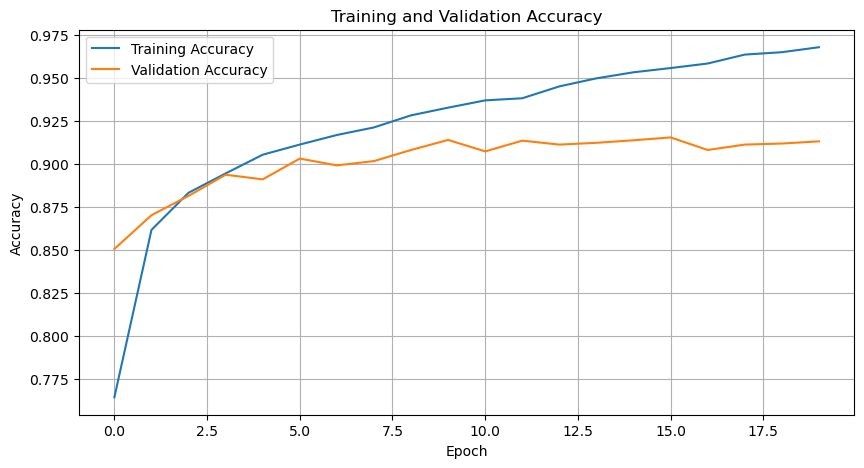

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [36]:
print("Accuracy = " ,cnn2.evaluate(X_test, y_test)[1])

375/375 [==============================] - 1s 3ms/step - loss: 0.2730 - accuracy: 0.9138
Accuracy =  0.9138333201408386


## CNN1 vs CNN2

CNN2 performs slightly better than CNN1
96% accuracy vs 94% accuracy on training set


## FCNN vs CNN


#### Number of parameters comparison
471478(CNN) vs 109386(FCNN)

#### CNN performs way better than FCNN
96% accuracy vs 91% accuracy on training set

#### CNN takes way more time for computation 
CNNs take more time for computation than normal neural networks due to their use of convolutional layers, pooling layers, and their specialization for processing high-dimensional image data with spatial relationships.
